In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('/content/boys.jpeg',1)

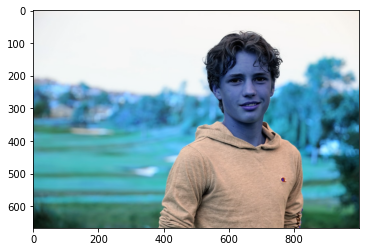

In [3]:
plt.imshow(img)

In [4]:
# Convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
# Rectange values: start x, start y, width, height
rectangle = (100,70, 800, 800)

In [6]:
mask = np.zeros(img_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(img_rgb,mask,rectangle,
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
img_rgb_nobg = img_rgb * mask_2[:, :, np.newaxis]

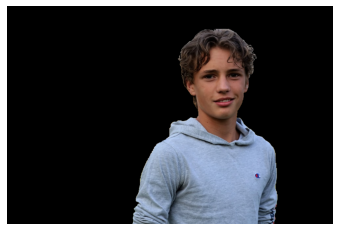

In [7]:
plt.imshow(img_rgb_nobg), plt.axis("off")
plt.show()